In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
retail = pd.read_csv("online_retail.csv")

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
retail.shape

(240007, 8)

In [5]:
retail.UnitPrice[:100]

0     2.55
1     3.39
2     2.75
3     3.39
4     3.39
      ... 
95    2.55
96    0.42
97    0.55
98    0.55
99    0.55
Name: UnitPrice, Length: 100, dtype: float64

In [15]:
# remove records where unit price has leading 0. 
retail_clean = retail[[str(x)[0] != '0' for x in retail.UnitPrice]]

In [16]:
retail_clean.shape

(193449, 8)

In [33]:
# extract all leading digits 
leading_digits = [int(str(x)[0]) for x in retail_clean.UnitPrice]

### Question 1

In [25]:
f_model1 = [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9]

In [70]:
f_model2 = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

In [27]:
n = retail_clean.shape[0]

In [59]:
digits_counts = np.unique(leading_digits, return_counts = True)
unique_digits = digits_counts[0]
f_real_counts = digits_counts[1]
f_real = f_real_counts/np.sum(f_real_counts)
f_real

array([0.37733976, 0.240177  , 0.09377148, 0.12205284, 0.05439677,
       0.01808229, 0.03750859, 0.03792214, 0.01874913])

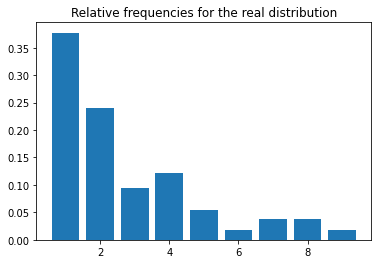

In [61]:
plt.bar(unique_digits, f_real)
plt.title('Relative frequencies for the real distribution')
plt.show()

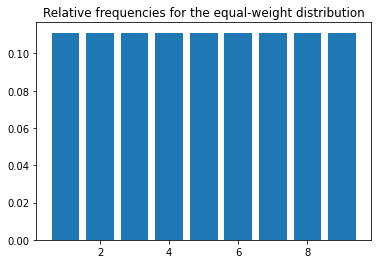

In [62]:
plt.bar(unique_digits, f_model1)
plt.title('Relative frequencies for the equal-weight distribution')
plt.show()

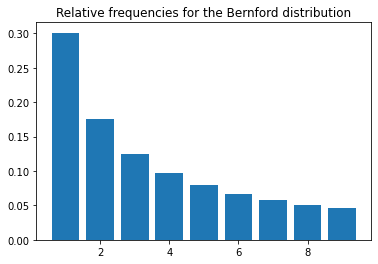

In [71]:
plt.bar(unique_digits, f_model2)
plt.title('Relative frequencies for the Bernford distribution')
plt.show()

### Question 2

In [76]:
rel_err_model1 = abs((f_real - f_model1)/f_real)
rel_err_model2 = abs((f_real - f_model2)/f_real)

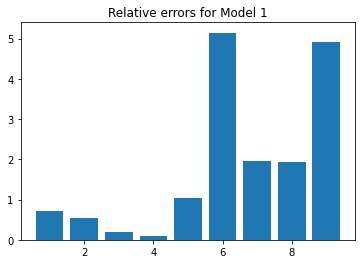

In [77]:
plt.bar(unique_digits, rel_err_model1)
plt.title('Relative errors for Model 1')
plt.show()

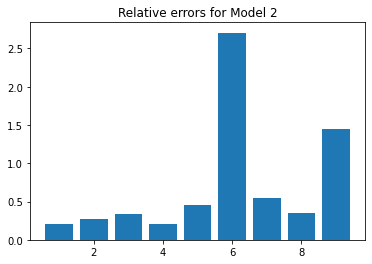

In [78]:
plt.bar(unique_digits, rel_err_model2)
plt.title('Relative errors for Model 2')
plt.show()

### Question 3

In [85]:
RMSE_model1 = np.sqrt(np.mean((f_real - f_model1)**2))
RMSE_model2 = np.sqrt(np.mean((f_real - f_model2)**2))

In [88]:
print("RMSE for model 1 is %.4f" % RMSE_model1)
print("RMSE for model 2 is %.4f" % RMSE_model2)

RMSE for model 1 is 0.1151
RMSE for model 2 is 0.0420


Model 2 is closer to the real distribution compared to Model 1

### Question 4(a)

In [90]:
np.unique(retail.Country)

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'Unit', 'United Arab Emirates',
       'United Kingdom', 'Unspecified'], dtype=object)

We select 'Hong Kong' for Asia, 'France' for Europe and 'Israel' for the Middle East. 

In [113]:
# 'Hong Kong'
# 'France'
# 'Israel'

For P and $\pi$, they stay the same for all countries. 

##### For Hong Kong, 

In [108]:
leading_digits_Asia = np.array(leading_digits)[list(retail_clean.Country == 'Hong Kong')]
leading_digits_count_Asia = np.unique(leading_digits_Asia, return_counts = True)[1]
F_Asia = leading_digits_count_Asia/sum(leading_digits_count_Asia)
F_Asia

array([0.46583851, 0.1863354 , 0.13664596, 0.1242236 , 0.00621118,
       0.00621118, 0.02484472, 0.02484472, 0.02484472])

##### For France, 

In [109]:
leading_digits_Europe = np.array(leading_digits)[list(retail_clean.Country == 'France')]
leading_digits_count_Europe = np.unique(leading_digits_Europe, return_counts = True)[1]
F_Europe = leading_digits_count_Europe/sum(leading_digits_count_Europe)
F_Europe

array([0.50431034, 0.24820402, 0.0625    , 0.07219828, 0.0233477 ,
       0.00897989, 0.03412356, 0.03304598, 0.01329023])

##### For Israel, 

In [117]:
leading_digits_MiddleEast = np.array(leading_digits)[list(retail_clean.Country == 'Israel')]
np.unique(leading_digits_MiddleEast, return_counts = True)

(array([1, 2, 3, 4, 6, 7, 8]), array([12,  2,  7,  5,  2,  3,  3]))

In [119]:
leading_digits_count_MiddleEast = np.array([12, 2, 7, 5, 0, 2, 3, 3, 0])
F_MiddleEast = leading_digits_count_MiddleEast/sum(leading_digits_count_MiddleEast)
F_MiddleEast

array([0.35294118, 0.05882353, 0.20588235, 0.14705882, 0.        ,
       0.05882353, 0.08823529, 0.08823529, 0.        ])

### Question 4(b)

In [121]:
RMSE_Asia = np.sqrt(np.mean((F_Asia - f_model1)**2))
RMSE_Europe = np.sqrt(np.mean((F_Europe - f_model1)**2))
RMSE_MiddleEast = np.sqrt(np.mean((F_MiddleEast - f_model1)**2))

In [122]:
print("RMSE for Asia is %.4f" % RMSE_Asia)
print("RMSE for Europe is %.4f" % RMSE_Europe)
print("RMSE for Middle East is %.4f" % RMSE_MiddleEast)

RMSE for Asia is 0.1401
RMSE for Europe is 0.1553
RMSE for Middle East is 0.1054


The country Israel, representing Middle East, has the frequency distribution "closest" to equal weight P. 

### Question 5

The Bernford's law provides the distribution of the leading digit closer to the real distribution of the leading digit, compared to the equal-weight distribution based on RMSE criterion.

The distribution of the leading digit for the Middle East is closer to the equal weight distribution compared to Asia and Europe, based on RMSE criterion. 